In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 596 kB 41.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('Serine/threonine-protein kinase Chk1')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'CHEK1', 'xref_name': None, 'xref...",Homo sapiens,Serine/threonine-protein kinase Chk1,41.0,False,CHEMBL4630,"[{'accession': 'O14757', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Homo sapiens,Serine/threonine-protein kinase Chk1/2,38.0,False,CHEMBL3883296,"[{'accession': 'O96017', 'component_descriptio...",PROTEIN FAMILY,9606.0
2,"[{'xref_id': 'Q8IWQ3', 'xref_name': None, 'xre...",Homo sapiens,BR serine/threonine-protein kinase 2,24.0,False,CHEMBL4574,"[{'accession': 'Q8IWQ3', 'component_descriptio...",SINGLE PROTEIN,9606.0
3,"[{'xref_id': 'Q13188', 'xref_name': None, 'xre...",Homo sapiens,Serine/threonine-protein kinase MST2,23.0,False,CHEMBL4708,"[{'accession': 'Q13188', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,"[{'xref_id': 'O00444', 'xref_name': None, 'xre...",Homo sapiens,Serine/threonine-protein kinase PLK4,23.0,False,CHEMBL3788,"[{'accession': 'O00444', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
4552,[],Homo sapiens,Geranylgeranyl transferase type-2,0.0,False,CHEMBL4523994,"[{'accession': 'P53611', 'component_descriptio...",PROTEIN COMPLEX,9606.0
4553,[],Rattus norvegicus,Geranylgeranyl transferase type-2,0.0,False,CHEMBL4523995,"[{'accession': 'Q08603', 'component_descriptio...",PROTEIN COMPLEX,10116.0
4554,[],Homo sapiens,Secretory phospholipase A2,0.0,False,CHEMBL4524005,"[{'accession': 'Q5R387', 'component_descriptio...",PROTEIN FAMILY,9606.0
4555,[],Rattus norvegicus,P2X receptor,0.0,False,CHEMBL4524013,"[{'accession': 'P51579', 'component_descriptio...",PROTEIN FAMILY,10116.0


In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL4630'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,149048,[],CHEMBL665163,Inhibition of checkpoint kinase-1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,uM,UO_0000065,None,4.0
1,None,161181,[],CHEMBL665163,Inhibition of checkpoint kinase-1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,UO_0000065,None,450.0
2,None,586954,[],CHEMBL798342,"Inhibition of Serine/threonine-protein kinase,...",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,uM,UO_0000065,None,40.0
3,None,750636,[],CHEMBL798939,Inhibition of Serine/threonine-protein kinase ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
4,None,1038873,[],CHEMBL799022,Inhibition of Serine/threonine-protein kinase ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,UO_0000065,None,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,None,22779686,[],CHEMBL4706923,Inhibition of CHK1 in human HT-29 cells assess...,B,None,None,BAO_0000179,BAO_0000219,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,None,None,30.0
2361,None,22843797,[],CHEMBL4720783,Inhibition of human CHK1 using KKKVSRSGLYRSPSM...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,10^-10M,None,None,1.42
2362,None,23116043,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512473,CHK1(CHE1CGP1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,pIC50,None,None,None,6.0
2363,None,23116452,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512186,CHK1(CHE1CGP1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,pIC50,None,None,None,6.0


In [ ]:
df.to_csv('bioactivity_data_raw.csv', index=False)

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df[df.canonical_smiles.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,149048,[],CHEMBL665163,Inhibition of checkpoint kinase-1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,uM,UO_0000065,None,4.0
1,None,161181,[],CHEMBL665163,Inhibition of checkpoint kinase-1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,UO_0000065,None,450.0
2,None,586954,[],CHEMBL798342,"Inhibition of Serine/threonine-protein kinase,...",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,uM,UO_0000065,None,40.0
3,None,750636,[],CHEMBL798939,Inhibition of Serine/threonine-protein kinase ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
4,None,1038873,[],CHEMBL799022,Inhibition of Serine/threonine-protein kinase ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,UO_0000065,None,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,None,22779686,[],CHEMBL4706923,Inhibition of CHK1 in human HT-29 cells assess...,B,None,None,BAO_0000179,BAO_0000219,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,None,None,30.0
2361,None,22843797,[],CHEMBL4720783,Inhibition of human CHK1 using KKKVSRSGLYRSPSM...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,10^-10M,None,None,1.42
2362,None,23116043,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512473,CHK1(CHE1CGP1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,pIC50,None,None,None,6.0
2363,None,23116452,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512186,CHK1(CHE1CGP1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,pIC50,None,None,None,6.0


In [ ]:
len(df2.canonical_smiles.unique())

2180

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,149048,[],CHEMBL665163,Inhibition of checkpoint kinase-1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,uM,UO_0000065,None,4.0
1,None,161181,[],CHEMBL665163,Inhibition of checkpoint kinase-1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,UO_0000065,None,450.0
2,None,586954,[],CHEMBL798342,"Inhibition of Serine/threonine-protein kinase,...",B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,uM,UO_0000065,None,40.0
3,None,750636,[],CHEMBL798939,Inhibition of Serine/threonine-protein kinase ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,UO_0000065,None,10000.0
4,None,1038873,[],CHEMBL799022,Inhibition of Serine/threonine-protein kinase ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,UO_0000065,None,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,None,22779641,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4706921,Inhibition of CHK1 (unknown origin) using 5-FA...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,None,None,1.9
2322,None,22779642,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4706921,Inhibition of CHK1 (unknown origin) using 5-FA...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,IC50,nM,None,None,14.0
2362,None,23116043,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512473,CHK1(CHE1CGP1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,pIC50,None,None,None,6.0
2363,None,23116452,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512186,CHK1(CHE1CGP1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Serine/threonine-protein kinase Chk1,9606,None,None,pIC50,None,None,None,6.0


In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL606052,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...,4000.0
1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,450.0
2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,40000.0
3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,10000.0
4,CHEMBL150894,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,3000.0
...,...,...,...
2321,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,1.9
2322,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,14.0
2362,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0
2363,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0


In [ ]:
df3.to_csv('bioactivity_data_preprocessed.csv', index=False)

In [ ]:
df4 = pd.read_csv('bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL606052,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...,4000.0,intermediate
1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,450.0,active
2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,40000.0,inactive
3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,10000.0,inactive
4,CHEMBL150894,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,3000.0,intermediate
...,...,...,...,...
2175,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,1.9,active
2176,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,14.0,active
2177,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active
2178,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active


In [ ]:
df5.to_csv('bioactivity_data_curated.csv', index=False)

In [ ]:
! zip acetylcholinesterase.zip *.csv

  adding: bioactivity_data_curated.csv (deflated 83%)
  adding: bioactivity_data_preprocessed.csv (deflated 81%)
  adding: bioactivity_data_raw.csv (deflated 91%)


In [ ]:
! ls -l

total 1692
-rw-r--r-- 1 root root  169187 Jun  8 15:32 acetylcholinesterase.zip
-rw-r--r-- 1 root root  171690 Jun  8 15:32 bioactivity_data_curated.csv
-rw-r--r-- 1 root root  153876 Jun  8 15:32 bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root 1226911 Jun  8 15:32 bioactivity_data_raw.csv
drwxr-xr-x 1 root root    4096 Jun  1 13:50 sample_data


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-06-08 15:32:38--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   114MB/s    in 0.7s    

2022-06-08 15:32:39 (114 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_data_curated.csv')
df
#Nice work...Next MIT

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL606052,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...,4000.0,intermediate
1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,450.0,active
2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,40000.0,inactive
3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,10000.0,inactive
4,CHEMBL150894,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,3000.0,intermediate
...,...,...,...,...
2175,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,1.9,active
2176,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,14.0,active
2177,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active
2178,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL606052,4000.0,intermediate,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...
1,CHEMBL58905,450.0,active,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1
2,CHEMBL296468,40000.0,inactive,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1
3,CHEMBL115220,10000.0,inactive,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1
4,CHEMBL150894,3000.0,intermediate,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...
...,...,...,...,...
2175,CHEMBL4754960,1.9,active,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1
2176,CHEMBL4741637,14.0,active,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1
2177,CHEMBL4088216,1000.0,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...
2178,CHEMBL4549667,1000.0,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,429.480,2.68658,1.0,7.0
1,415.247,4.43310,3.0,6.0
2,380.539,3.65900,2.0,7.0
3,291.354,3.62150,2.0,2.0
4,440.543,4.91650,2.0,4.0
...,...,...,...,...
2175,345.794,1.54058,3.0,8.0
2176,329.339,1.02628,3.0,8.0
2177,402.454,2.35370,0.0,5.0
2178,481.350,3.11620,0.0,5.0


In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,429.480,2.68658,1.0,7.0
1,415.247,4.43310,3.0,6.0
2,380.539,3.65900,2.0,7.0
3,291.354,3.62150,2.0,2.0
4,440.543,4.91650,2.0,4.0
...,...,...,...,...
2175,345.794,1.54058,3.0,8.0
2176,329.339,1.02628,3.0,8.0
2177,402.454,2.35370,0.0,5.0
2178,481.350,3.11620,0.0,5.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL606052,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...,4000.0,intermediate
1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,450.0,active
2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,40000.0,inactive
3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,10000.0,inactive
4,CHEMBL150894,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,3000.0,intermediate
...,...,...,...,...
2175,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,1.9,active
2176,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,14.0,active
2177,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active
2178,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL606052,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...,4000.0,intermediate,429.480,2.68658,1.0,7.0
1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,450.0,active,415.247,4.43310,3.0,6.0
2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,40000.0,inactive,380.539,3.65900,2.0,7.0
3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,10000.0,inactive,291.354,3.62150,2.0,2.0
4,CHEMBL150894,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,3000.0,intermediate,440.543,4.91650,2.0,4.0
...,...,...,...,...,...,...,...,...
2175,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,1.9,active,345.794,1.54058,3.0,8.0
2176,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,14.0,active,329.339,1.02628,3.0,8.0
2177,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active,402.454,2.35370,0.0,5.0
2178,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active,481.350,3.11620,0.0,5.0


In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [ ]:
df_combined.standard_value.describe()

count    2.109000e+03
mean     5.025427e+05
std      1.513099e+07
min      3.000000e-02
25%      9.000000e+00
50%      6.800000e+01
75%      1.610000e+03
max      6.606934e+08
Name: standard_value, dtype: float64

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL606052,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...,intermediate,429.480,2.68658,1.0,7.0,4000.0
1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,active,415.247,4.43310,3.0,6.0,450.0
2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,inactive,380.539,3.65900,2.0,7.0,40000.0
3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,291.354,3.62150,2.0,2.0,10000.0
4,CHEMBL150894,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,intermediate,440.543,4.91650,2.0,4.0,3000.0
...,...,...,...,...,...,...,...,...
2175,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,active,345.794,1.54058,3.0,8.0,1.9
2176,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,active,329.339,1.02628,3.0,8.0,14.0
2177,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,1000.0
2178,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,1000.0


In [ ]:
df_norm.standard_value_norm.describe()

count    2.109000e+03
mean     1.894940e+05
std      3.562307e+06
min      3.000000e-02
25%      9.000000e+00
50%      6.800000e+01
75%      1.610000e+03
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL606052,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...,intermediate,429.480,2.68658,1.0,7.0,5.397940
1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,active,415.247,4.43310,3.0,6.0,6.346787
2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,inactive,380.539,3.65900,2.0,7.0,4.397940
3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,291.354,3.62150,2.0,2.0,5.000000
4,CHEMBL150894,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,intermediate,440.543,4.91650,2.0,4.0,5.522879
...,...,...,...,...,...,...,...,...
2175,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,active,345.794,1.54058,3.0,8.0,8.721246
2176,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,active,329.339,1.02628,3.0,8.0,7.853872
2177,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
2178,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL606052,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...,intermediate,429.480,2.68658,1.0,7.0,5.397940
1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,active,415.247,4.43310,3.0,6.0,6.346787
2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,inactive,380.539,3.65900,2.0,7.0,4.397940
3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,291.354,3.62150,2.0,2.0,5.000000
4,CHEMBL150894,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,intermediate,440.543,4.91650,2.0,4.0,5.522879
...,...,...,...,...,...,...,...,...
2175,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,active,345.794,1.54058,3.0,8.0,8.721246
2176,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,active,329.339,1.02628,3.0,8.0,7.853872
2177,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
2178,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [ ]:
df_final.to_csv('bioactivity_data_3class_pIC50.csv')

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,active,415.247,4.43310,3.0,6.0,6.346787
2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,inactive,380.539,3.65900,2.0,7.0,4.397940
3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,291.354,3.62150,2.0,2.0,5.000000
5,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,active,484.431,6.54092,2.0,6.0,6.000000
6,CHEMBL332551,Nc1nc(C2=C3C(=Nc4ccccc43)C(=O)NCC2)c(O)[nH]1,active,295.302,1.21430,4.0,5.0,6.625252
...,...,...,...,...,...,...,...,...
2175,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,active,345.794,1.54058,3.0,8.0,8.721246
2176,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,active,329.339,1.02628,3.0,8.0,7.853872
2177,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
2178,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

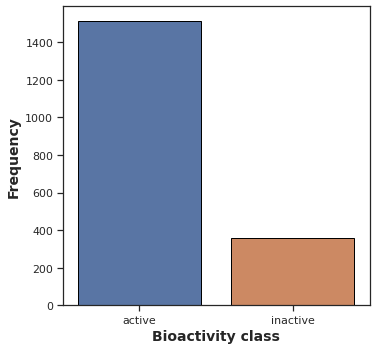

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

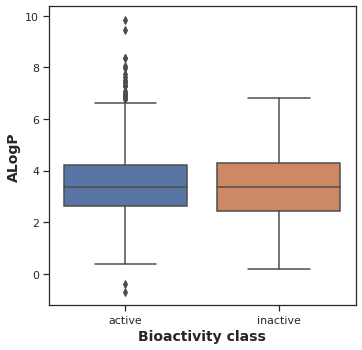

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x ='class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('ALogP', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

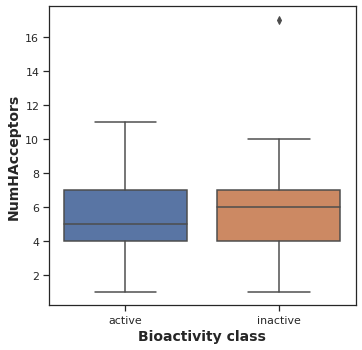

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

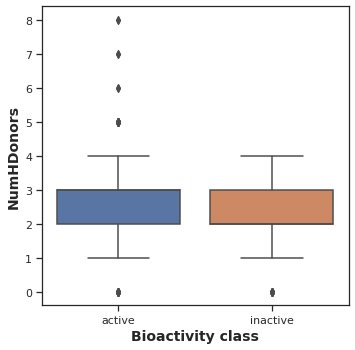

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

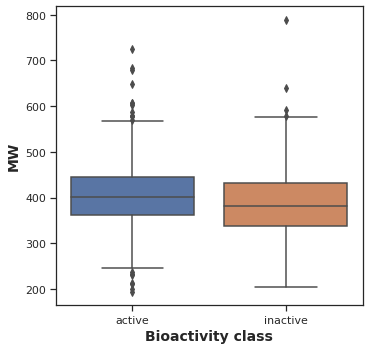

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
! wget https://github.com/alSabre/CSE499A/raw/main/padel.zip
! wget https://github.com/alSabre/CSE499A/raw/main/padel.sh

--2022-06-08 15:33:40--  https://github.com/alSabre/CSE499A/raw/main/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/nahianalsabri/CSE499A/raw/main/padel.zip [following]
--2022-06-08 15:33:40--  https://github.com/nahianalsabri/CSE499A/raw/main/padel.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nahianalsabri/CSE499A/main/padel.zip [following]
--2022-06-08 15:33:40--  https://raw.githubusercontent.com/nahianalsabri/CSE499A/main/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257686

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
import pandas as pd

In [ ]:
df3 = pd.read_csv('bioactivity_data_3class_pIC50.csv')

In [ ]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL606052,N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)c...,intermediate,429.480,2.68658,1.0,7.0,5.397940
1,1,CHEMBL58905,COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1,active,415.247,4.43310,3.0,6.0,6.346787
2,2,CHEMBL296468,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,inactive,380.539,3.65900,2.0,7.0,4.397940
3,3,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,291.354,3.62150,2.0,2.0,5.000000
4,4,CHEMBL150894,CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1...,intermediate,440.543,4.91650,2.0,4.0,5.522879
...,...,...,...,...,...,...,...,...,...
2175,2175,CHEMBL4754960,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(Cl)cn2)cn1,active,345.794,1.54058,3.0,8.0,8.721246
2176,2176,CHEMBL4741637,N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(F)cn2)cn1,active,329.339,1.02628,3.0,8.0,7.853872
2177,2177,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
2178,2178,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

N#Cc1ccc2c(c1)NC(=O)C2c1ncnc2cc(OCCCN3CCOCC3)ccc12	CHEMBL606052
COc1ccc(Nc2nc(Nc3ccc(C(=O)O)cc3)ncc2Br)cc1	CHEMBL58905
CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1	CHEMBL296468
O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1	CHEMBL115220
CC(C)OCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1-4)C(=O)NC3	CHEMBL150894


In [ ]:
! cat molecule.smi | wc -l

2180


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv

In [ ]:
! bash padel.sh

Processing CHEMBL606052 in molecule.smi (1/2180). 
Processing CHEMBL58905 in molecule.smi (2/2180). 
Processing CHEMBL115220 in molecule.smi (4/2180). Average speed: 3.22 s/mol.
Processing CHEMBL296468 in molecule.smi (3/2180). Average speed: 5.96 s/mol.
Processing CHEMBL150894 in molecule.smi (5/2180). Average speed: 2.26 s/mol.
Processing CHEMBL281957 in molecule.smi (6/2180). Average speed: 1.98 s/mol.
Processing CHEMBL332551 in molecule.smi (7/2180). Average speed: 1.88 s/mol.
Processing CHEMBL361708 in molecule.smi (8/2180). Average speed: 1.68 s/mol.
Processing CHEMBL255465 in molecule.smi (9/2180). Average speed: 1.45 s/mol.
Processing CHEMBL190201 in molecule.smi (11/2180). Average speed: 1.16 s/mol.
Processing CHEMBL1788116 in molecule.smi (10/2180). Average speed: 1.30 s/mol.
Processing CHEMBL364811 in molecule.smi (13/2180). Average speed: 1.06 s/mol.
Processing CHEMBL189434 in molecule.smi (12/2180). Average speed: 1.12 s/mol.
Processing CHEMBL366312 in molecule.smi (15/218

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
from google.colab import files

In [ ]:
#files.download('/content/descriptors_output.csv')

In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL58905,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL606052,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL296468,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL115220,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL281957,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,CHEMBL4754960,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2176,CHEMBL4741637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2177,CHEMBL4088216,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2178,CHEMBL4549667,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2176,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2177,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2178,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_Y = df3['pIC50']
df3_Y

0       5.397940
1       6.346787
2       4.397940
3       5.000000
4       5.522879
          ...   
2175    8.721246
2176    7.853872
2177    6.000000
2178    6.000000
2179    6.000000
Name: pIC50, Length: 2180, dtype: float64

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.397940
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.346787
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.397940
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.721246
2176,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.853872
2177,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
2178,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


In [ ]:
dataset3.to_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = dataset3.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2176,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2177,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2178,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset3.pIC50
Y

0       5.397940
1       6.346787
2       4.397940
3       5.000000
4       5.522879
          ...   
2175    8.721246
2176    7.853872
2177    6.000000
2178    6.000000
2179    6.000000
Name: pIC50, Length: 2180, dtype: float64

In [ ]:
#added today evening
nahian=Y.to_numpy()
nahian

array([5.39794001, 6.34678749, 4.39794001, ..., 6.        , 6.        ,
       6.        ])

In [ ]:
nahian.size

2180

In [ ]:
X.shape

(2180, 881)

In [ ]:
Y.shape

(2180,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)


In [ ]:
X.shape

(2180, 187)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((1744, 187), (1744,))

In [ ]:
X_test.shape, Y_test.shape

((436, 187), (436,))

In [ ]:
import numpy as np
#X_train = X_train.str.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
#def clean_dataset(df):
   # assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    #df.dropna(inplace=True)
    #indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    #return df[indices_to_keep].astype(np.float64)

In [ ]:
dataset3.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
count,2180.0,2180.000000,2180.000000,2180.000000,2180.0,2180.0,2180.0,2180.0,2180.0,2180.0,...,2180.0,2180.0,2180.0,2180.0,2180.0,2180.0,2180.0,2180.0,2180.0,2109.000000
mean,1.0,0.995413,0.767890,0.027523,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.908416
std,0.0,0.067589,0.422276,0.163639,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.503497
min,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,1.0,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.793174
50%,1.0,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.167491
75%,1.0,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.045757
max,1.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.522879


In [ ]:
value = dataset3.quantile(0.98)
dataset3= dataset3.replace(np.inf, value)

In [ ]:
dataset3.isnull().any()

PubchemFP0      False
PubchemFP1      False
PubchemFP2      False
PubchemFP3      False
PubchemFP4      False
                ...  
PubchemFP877    False
PubchemFP878    False
PubchemFP879    False
PubchemFP880    False
pIC50            True
Length: 882, dtype: bool

**XG BOOST implementation starts**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[15:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
preds

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

In [ ]:
Y_test

1227    6.628932
202     7.136677
18      4.000000
1046    6.050610
1218    6.600326
          ...   
1445         NaN
40      5.460297
836          NaN
281     7.886057
74      7.823909
Name: pIC50, Length: 436, dtype: float64

In [ ]:
preds.size

436

In [ ]:
Y_test = np.nan_to_num(Y_test)
Y_test.size

436

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 6.408711


In [ ]:
dataset3.isnull ().sum()

PubchemFP0       0
PubchemFP1       0
PubchemFP2       0
PubchemFP3       0
PubchemFP4       0
                ..
PubchemFP877     0
PubchemFP878     0
PubchemFP879     0
PubchemFP880     0
pIC50           71
Length: 882, dtype: int64

**ends**

In [ ]:
X_train.shape

(1744, 187)

**Random Forrest Regressor Implementation**

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
X_train = np.nan_to_num(X_train)
Y_train = np.nan_to_num(Y_train)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2.221278


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

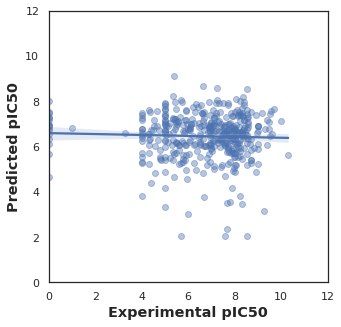

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
#displaying the predicted values
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
Y_pred

array([4.83250095, 6.34818557, 7.25325223, 6.19751875, 7.48206221,
       6.89002713, 6.74475317, 5.50041345, 7.95848584, 7.51795331,
       6.73126405, 6.18624242, 6.68844958, 9.09238231, 6.28793702,
       6.53715431, 6.98168568, 6.85474844, 7.60904245, 5.83292447,
       6.85918549, 7.38958615, 6.74830442, 3.76598862, 5.44743931,
       6.45614304, 6.14903502, 7.95848584, 5.93153147, 3.81243505,
       5.2747304 , 4.97497612, 6.63317218, 6.84687961, 6.7808795 ,
       6.29215046, 6.61601089, 5.31029946, 6.07573991, 6.96403816,
       6.68678966, 6.06733562, 8.55845127, 6.30819435, 7.01101374,
       7.59422035, 5.51898346, 6.52367893, 5.1966872 , 6.55506278,
       7.2640337 , 5.66783802, 6.41906247, 7.16404399, 7.52952603,
       6.31716329, 6.77332887, 6.98508005, 7.68701431, 7.21405345,
       7.77662389, 6.99559645, 6.68678966, 6.60987819, 6.48269099,
       6.07488108, 6.24153714, 6.5882286 , 6.55716536, 6.46403526,
       6.55441212, 6.86236477, 7.53558358, 4.38448985, 7.06950

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2.221278
